In [16]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


In [144]:


dirs = ['R1398','R1399','R1400','R1401','U1398','U1399','U1400','U1401']

dir = dirs[0]
total_df=pd.read_csv(f'../{dir}/clus_data/{dir}_total.csv')
def f(col1,col2):
    return col1/col2

# total_df['total_income']=total_df.apply(lambda x :f(x.total_income,x.member),axis=1)
# total_df['total_cost']=total_df.apply(lambda x :f(x.total_cost,x.member),axis=1)

# total_df['total_income']=total_df['total_income']/1000000
# total_df['total_cost']=total_df['total_cost']/1000000
# total_df['total']=total_df.iloc[:,1:].sum(axis=1)


# total_df['total_income'] = np.log2(total_df['total_income'])
# total_df['total_cost'] = np.log2(total_df['total_cost'])


# total_df=total_df.iloc[:, [1, 3]]
total_df=total_df.iloc[:,1:]
total_df[total_df.isnull().any(axis=1)]
total_df_corr =total_df
total_df=total_df[['member','Male_count','Female_count','age','literacy','vehicle','motorcycle','facilities','total_cost','total_income']]

In [88]:
total_df.columns


Index(['member', 'Male_count', 'Female_count', 'age', 'literacy', 'vehicle',
       'motorcycle', 'facilities', 'total_cost', 'total_income'],
      dtype='object')

**Robust scaler**

In [95]:
from sklearn.preprocessing import RobustScaler

rbs_data_scaled = RobustScaler(with_centering = True, with_scaling = True).fit_transform(total_df)



**elbow rbs**

within cluster sum of squared distance for k=2:  156612.46169186098
within cluster sum of squared distance for k=3:  128860.1077842802
within cluster sum of squared distance for k=4:  109583.30136104136
within cluster sum of squared distance for k=5:  100778.45818232544
within cluster sum of squared distance for k=6:  91471.66288993615
within cluster sum of squared distance for k=7:  84308.40945481017
within cluster sum of squared distance for k=8:  76024.39045796297
within cluster sum of squared distance for k=9:  70510.53934872181
within cluster sum of squared distance for k=10:  67182.88861216776
within cluster sum of squared distance for k=11:  64700.98299773925
within cluster sum of squared distance for k=12:  61797.29644820742
within cluster sum of squared distance for k=13:  60838.08354742418
within cluster sum of squared distance for k=14:  57667.3227614841
within cluster sum of squared distance for k=15:  55579.872934235245
within cluster sum of squared distance for k=16:  545

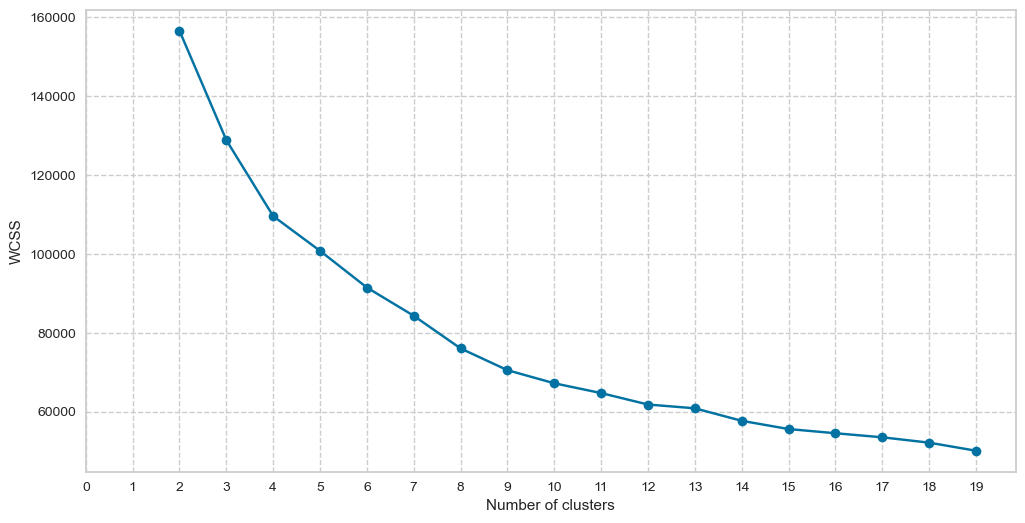

In [96]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(rbs_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette rbs**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


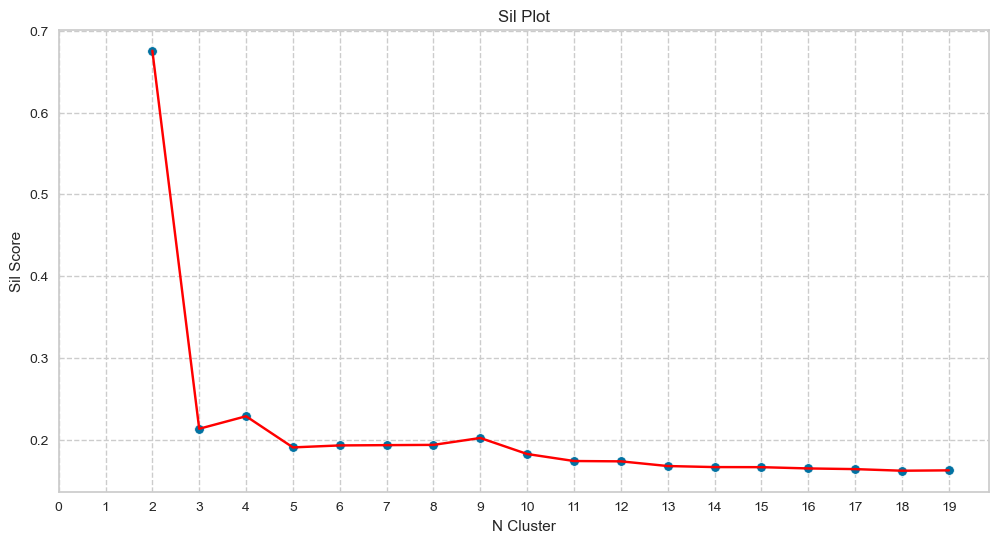

In [97]:
from sklearn.metrics import silhouette_score
df =rbs_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**PCA rbs**

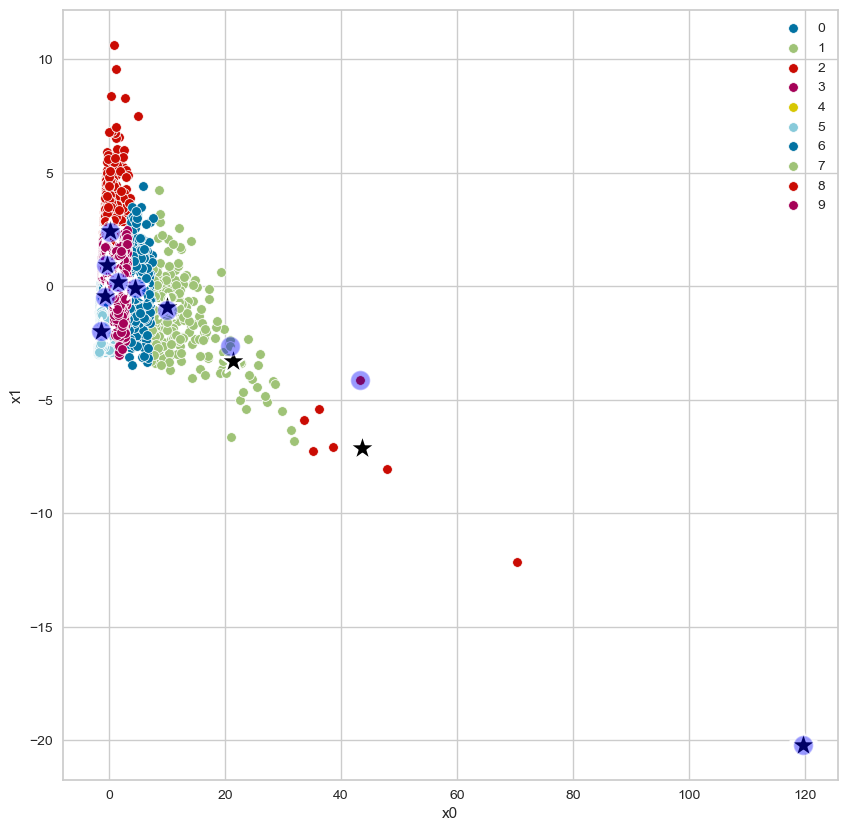

In [98]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(rbs_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**L2 norm**

In [100]:
l2_data_scaled = preprocessing.normalize(total_df, norm='l2')
l2_data_scaled = pd.DataFrame(l2_data_scaled, columns = total_df.columns)

**elbow l2**

within cluster sum of squared distance for k=2:  792.56673063335
within cluster sum of squared distance for k=3:  363.0438766456667
within cluster sum of squared distance for k=4:  216.3842135577014
within cluster sum of squared distance for k=5:  150.94121547897507
within cluster sum of squared distance for k=6:  114.27987486064893
within cluster sum of squared distance for k=7:  91.00717978453802
within cluster sum of squared distance for k=8:  68.60000951111296
within cluster sum of squared distance for k=9:  54.31153385442961
within cluster sum of squared distance for k=10:  43.401158410555276
within cluster sum of squared distance for k=11:  35.87836522392894
within cluster sum of squared distance for k=12:  30.52263078879671
within cluster sum of squared distance for k=13:  25.944562148357356
within cluster sum of squared distance for k=14:  22.596909790809264
within cluster sum of squared distance for k=15:  19.960002005491543
within cluster sum of squared distance for k=16:  17

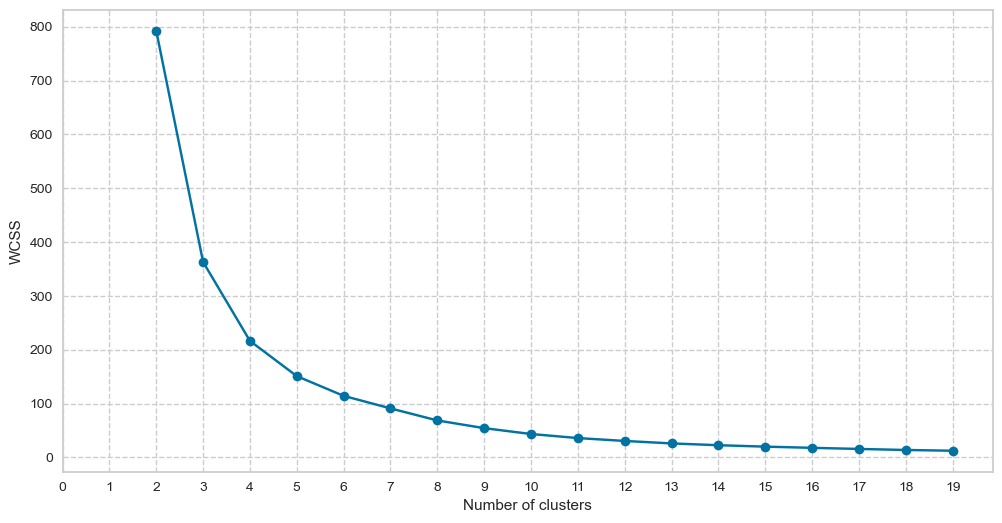

In [101]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(l2_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette l2**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


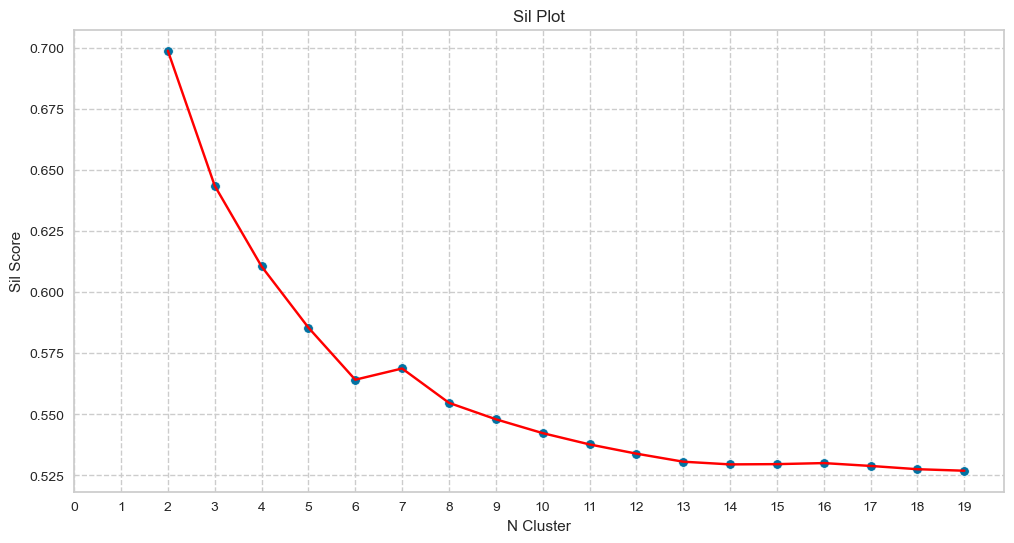

In [102]:
from sklearn.metrics import silhouette_score
df =l2_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

<p dir=rtl style="direction: rtl;text-align justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
این جا براساس شکستگی sil و elbow  و در رسم نمودار بعدی از آن استفاده می کنیم مقادیر 5 یا 6 مناسب است که ما مقدار 6 رو انتخاب میکنیم
</p>

**Pca l2**

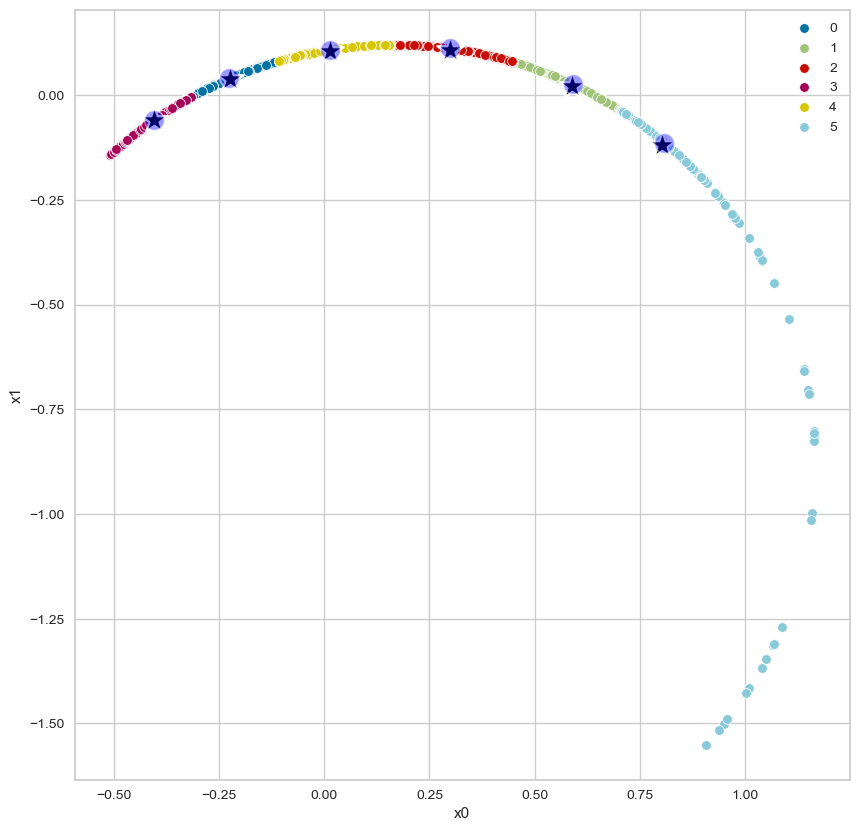

In [105]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(l2_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 6,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center l2**

In [106]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_7580\870627896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 4355, 17260,  5668,  6828,  1560, 12881], dtype=int64)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 visualize**

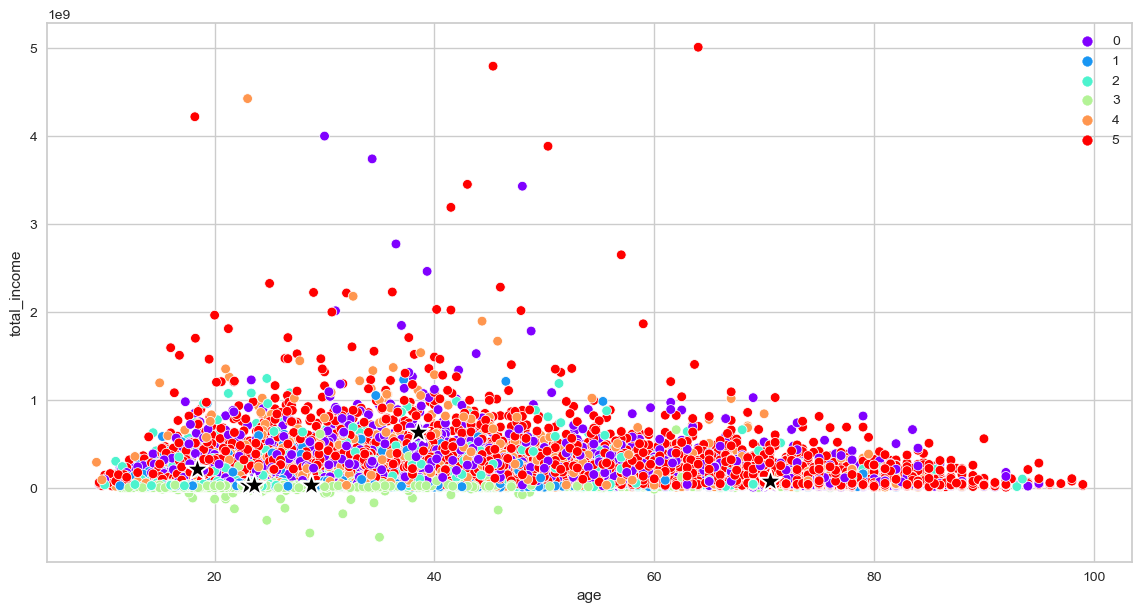

In [108]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 points**

In [109]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
1560,4,3,1,38.500,1.000,1,0,9,393219091.0,631790000.0,4
4355,8,4,4,18.375,0.625,1,0,8,70280000.0,210280000.0,0
12881,2,1,1,70.500,0.000,0,0,4,11012276.0,78720000.0,5
17260,5,2,3,28.800,0.800,0,0,8,74677038.0,32570000.0,1
5668,5,2,3,23.000,0.800,1,0,4,30776940.0,27300000.0,2
6828,5,3,2,23.600,0.800,1,1,5,186875400.0,24575000.0,3


**MaxAbs scaler**

In [159]:
scaler = MaxAbsScaler()
data_scaled =scaler.fit_transform(total_df)
data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)


**min_max scaler**

In [114]:
minmax_scaler = MinMaxScaler()
minmax_data_scaled =minmax_scaler.fit_transform(total_df)
minmax_data_scaled = pd.DataFrame(minmax_data_scaled, columns = total_df.columns)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
به نظر میاد احتمالا min_max scaler va MaxAbsScaler بهتر میتونه نقاط شکستگی نمودار elbow و Silhoeute رو نمایش بده
</p>

**elbow min_max**

within cluster sum of squared distance for k=2:  10819.455087930975
within cluster sum of squared distance for k=3:  7640.06207457762
within cluster sum of squared distance for k=4:  6328.3445112496265
within cluster sum of squared distance for k=5:  4963.280364222763
within cluster sum of squared distance for k=6:  4567.339266446748
within cluster sum of squared distance for k=7:  4155.265727865331
within cluster sum of squared distance for k=8:  3348.086029608042
within cluster sum of squared distance for k=9:  2951.762042196217
within cluster sum of squared distance for k=10:  2754.5813631450233
within cluster sum of squared distance for k=11:  2657.2743331368497
within cluster sum of squared distance for k=12:  2553.5267839851767
within cluster sum of squared distance for k=13:  2411.5647558674154
within cluster sum of squared distance for k=14:  2345.9220138102373
within cluster sum of squared distance for k=15:  2264.069654828983
within cluster sum of squared distance for k=16:  

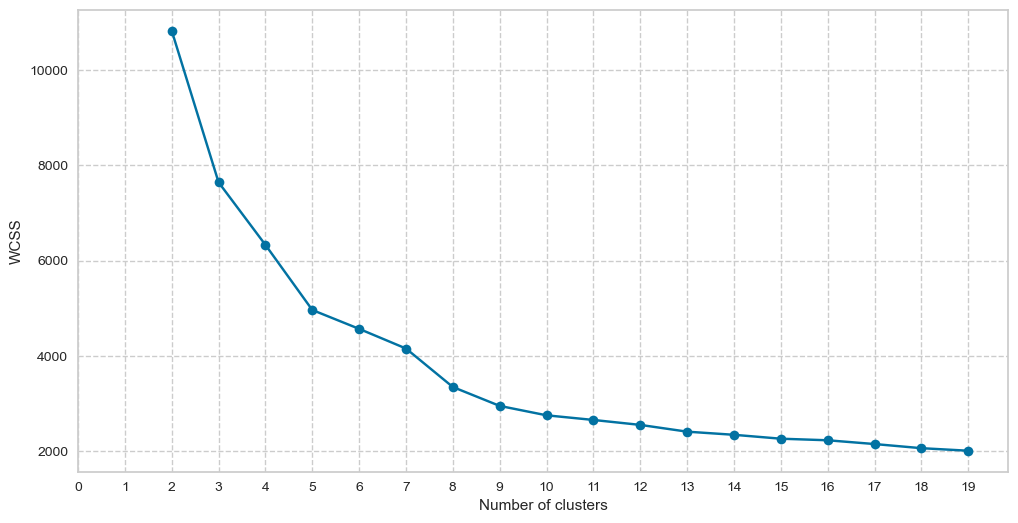

In [115]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(minmax_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette min_max**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


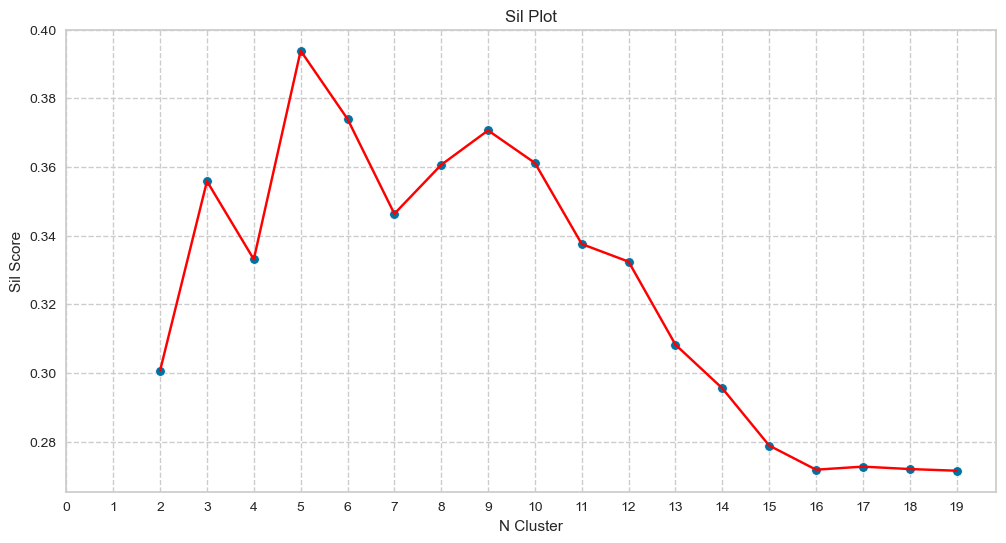

In [116]:
from sklearn.metrics import silhouette_score
df =minmax_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Pca min_max**

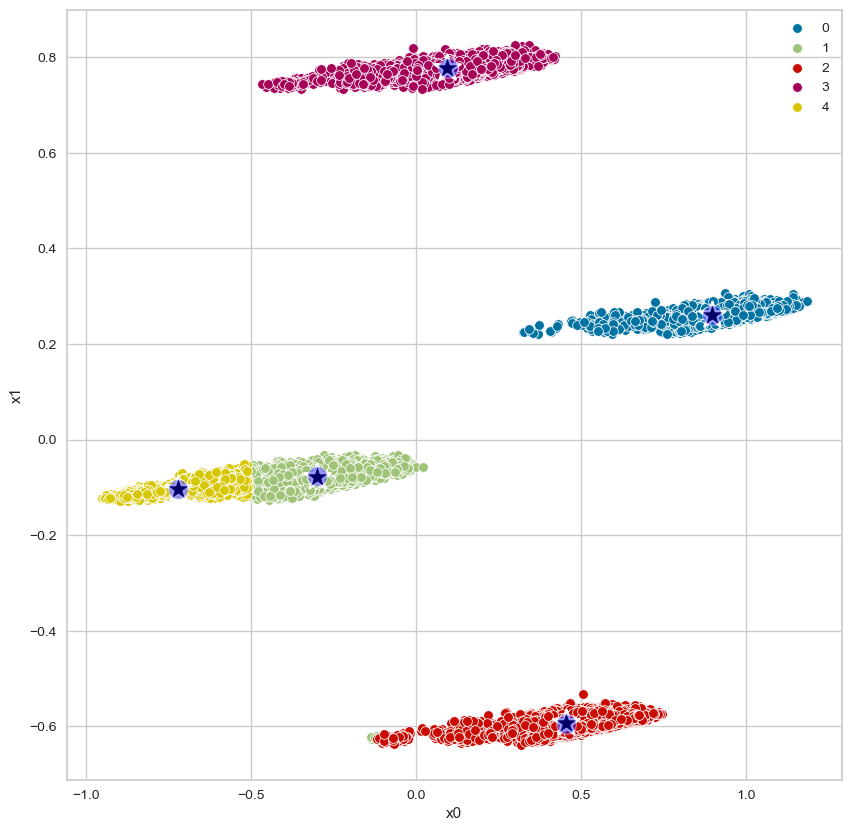

In [117]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(minmax_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**standard scaler**

In [94]:
z_scaler = StandardScaler()
z_data_scaled =z_scaler.fit_transform(total_df)
z_data_scaled = pd.DataFrame(z_data_scaled, columns = total_df.columns)


**elbow standard scaler**

within cluster sum of squared distance for k=2:  142037.7094159302
within cluster sum of squared distance for k=3:  128470.38658752812
within cluster sum of squared distance for k=4:  113993.83655188458
within cluster sum of squared distance for k=5:  106089.14907898476
within cluster sum of squared distance for k=6:  97448.94078376981
within cluster sum of squared distance for k=7:  93586.56079086325
within cluster sum of squared distance for k=8:  89575.06198263956
within cluster sum of squared distance for k=9:  84804.35620347798
within cluster sum of squared distance for k=10:  84013.70154617372
within cluster sum of squared distance for k=11:  78994.77571266028
within cluster sum of squared distance for k=12:  76612.70753044054
within cluster sum of squared distance for k=13:  74754.01493852495
within cluster sum of squared distance for k=14:  70504.84643523474
within cluster sum of squared distance for k=15:  68962.95560768097
within cluster sum of squared distance for k=16:  669

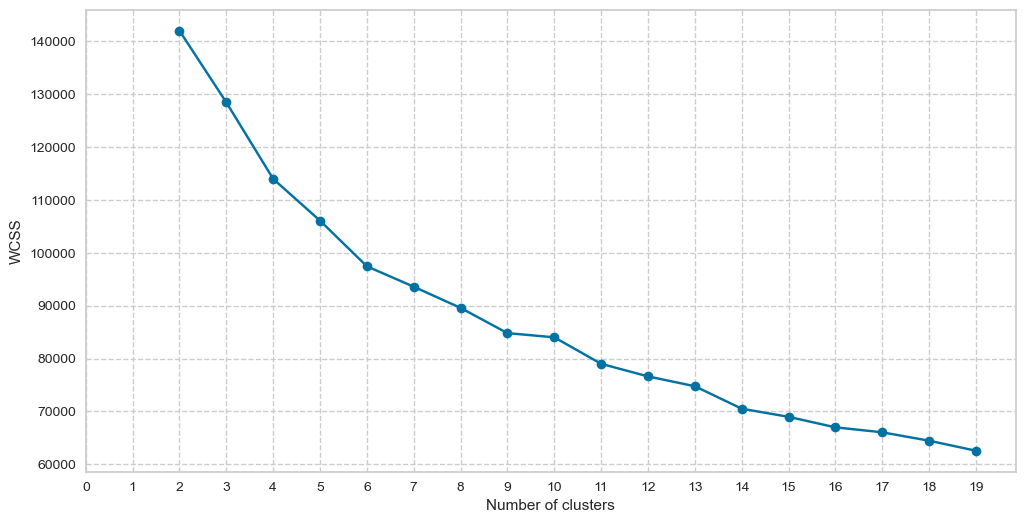

In [118]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(z_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

k=6 ro mishe ye noghte shekast darnazar gereft ama vaghean moshakhas nist kheily
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Silhouette standard scaler**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


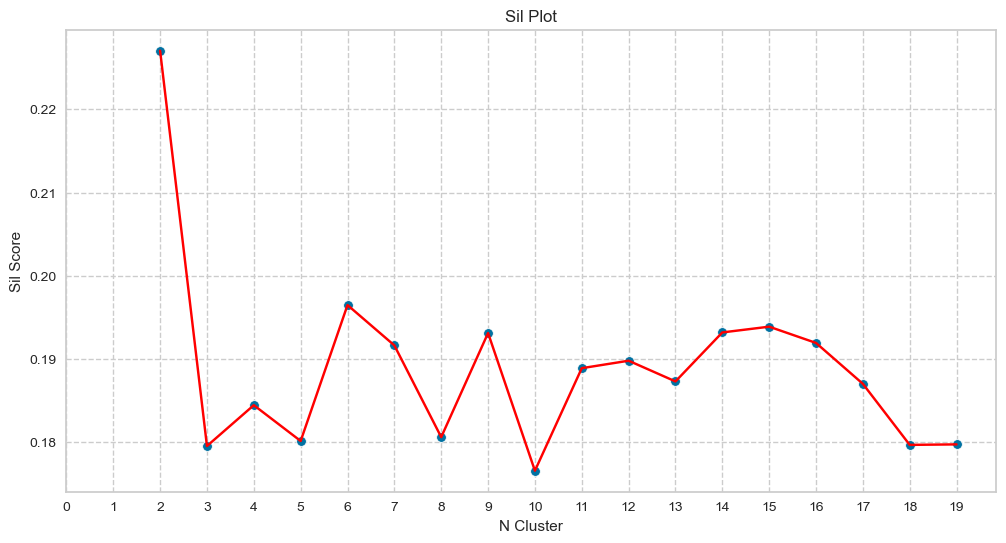

In [119]:
from sklearn.metrics import silhouette_score
df =z_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

mibinim ke natije Sil plot jaleb nist
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Pca standard scaler**

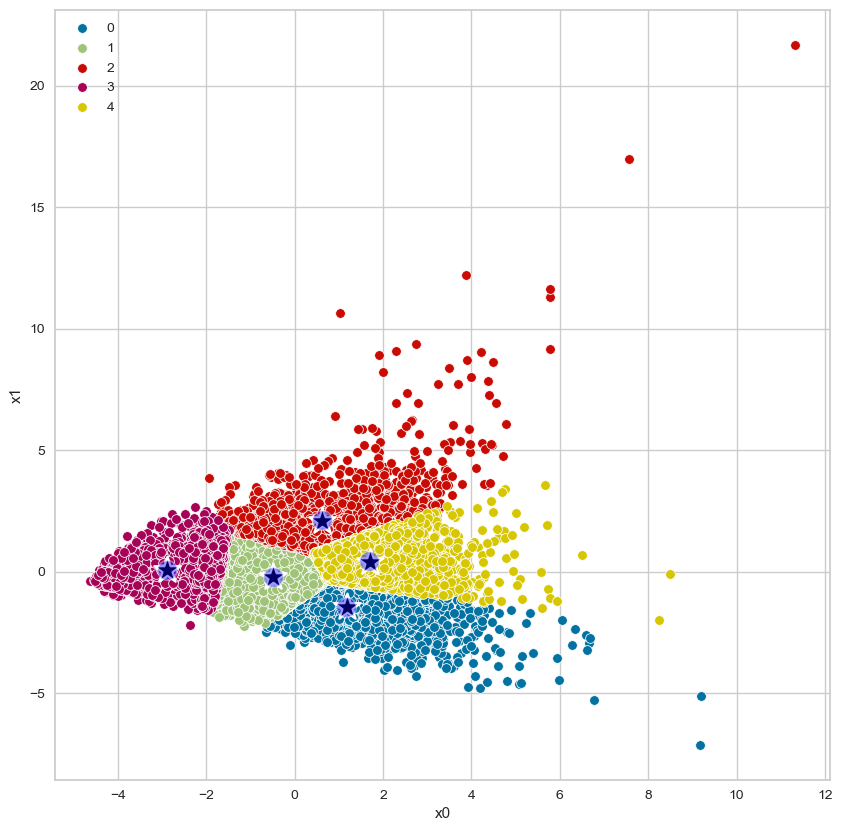

In [120]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(z_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center standard scaler visualization**

C:\Users\theki\AppData\Local\Temp\ipykernel_7580\224913684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


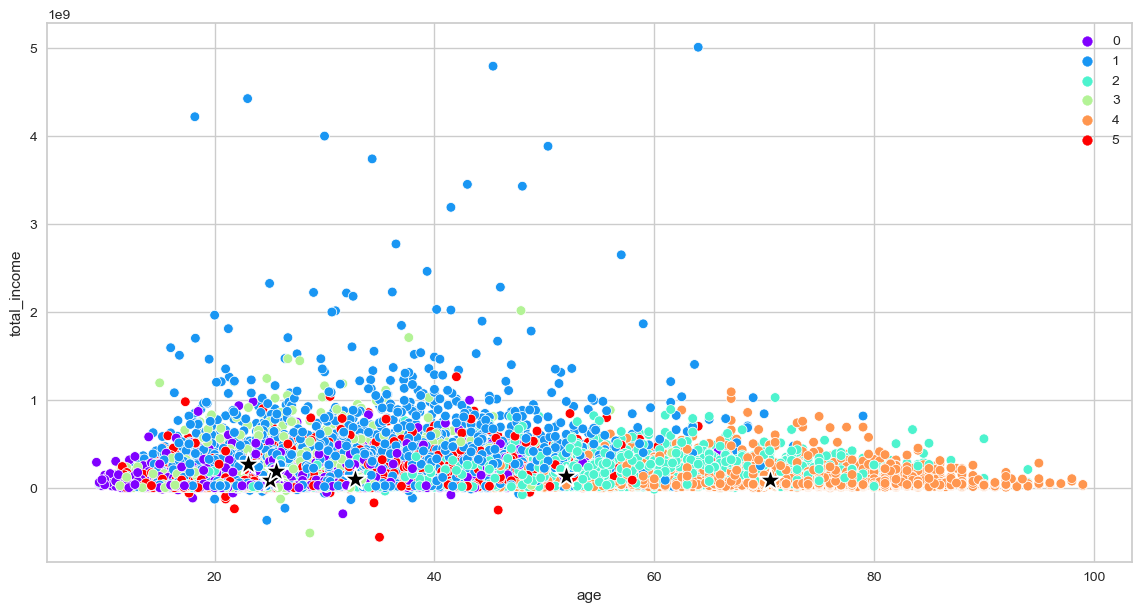

In [135]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(z_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, z_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center standard scaler points**

In [136]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
1176,4,2,2,23.000000,0.750000,1,0,7,188968800.0,265990000.0,1
3831,7,3,4,25.571429,0.857143,0,0,5,61210716.0,188220000.0,3
9179,2,1,1,52.000000,0.500000,0,0,5,58067372.0,136630000.0,2
13858,4,2,2,32.750000,0.750000,0,1,5,107191052.0,95840000.0,5
3261,2,1,1,70.500000,0.000000,0,0,4,42281260.0,88010000.0,4
6461,4,2,2,25.000000,0.750000,0,0,4,71550940.0,83540000.0,0



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
از نمودار و این خوشه ها نتیجه به این شکل نشون داده میشه
</p>

In [41]:
# data_scaled=total_df

<Axes: >

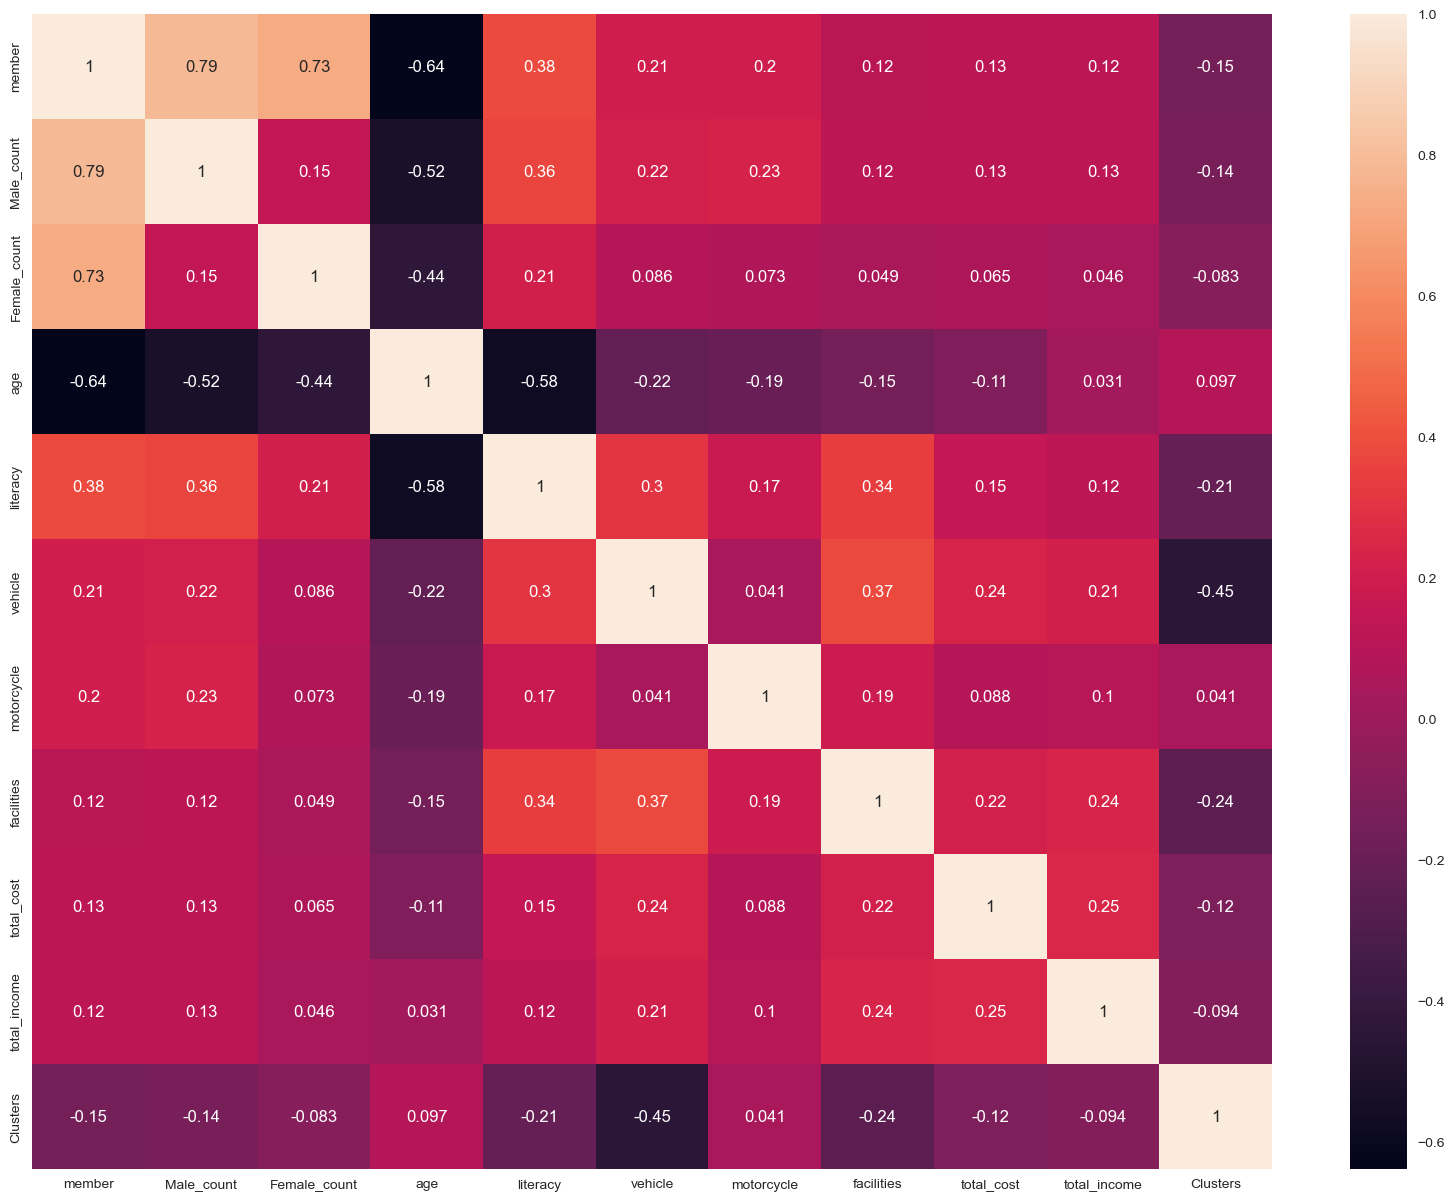

In [160]:
corr = pd.DataFrame(data_scaled).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر سن افراد خانواده بیشتر باشه هزینه هاشون کمتر میشه
</p>

**min_max scaler**

<Axes: >

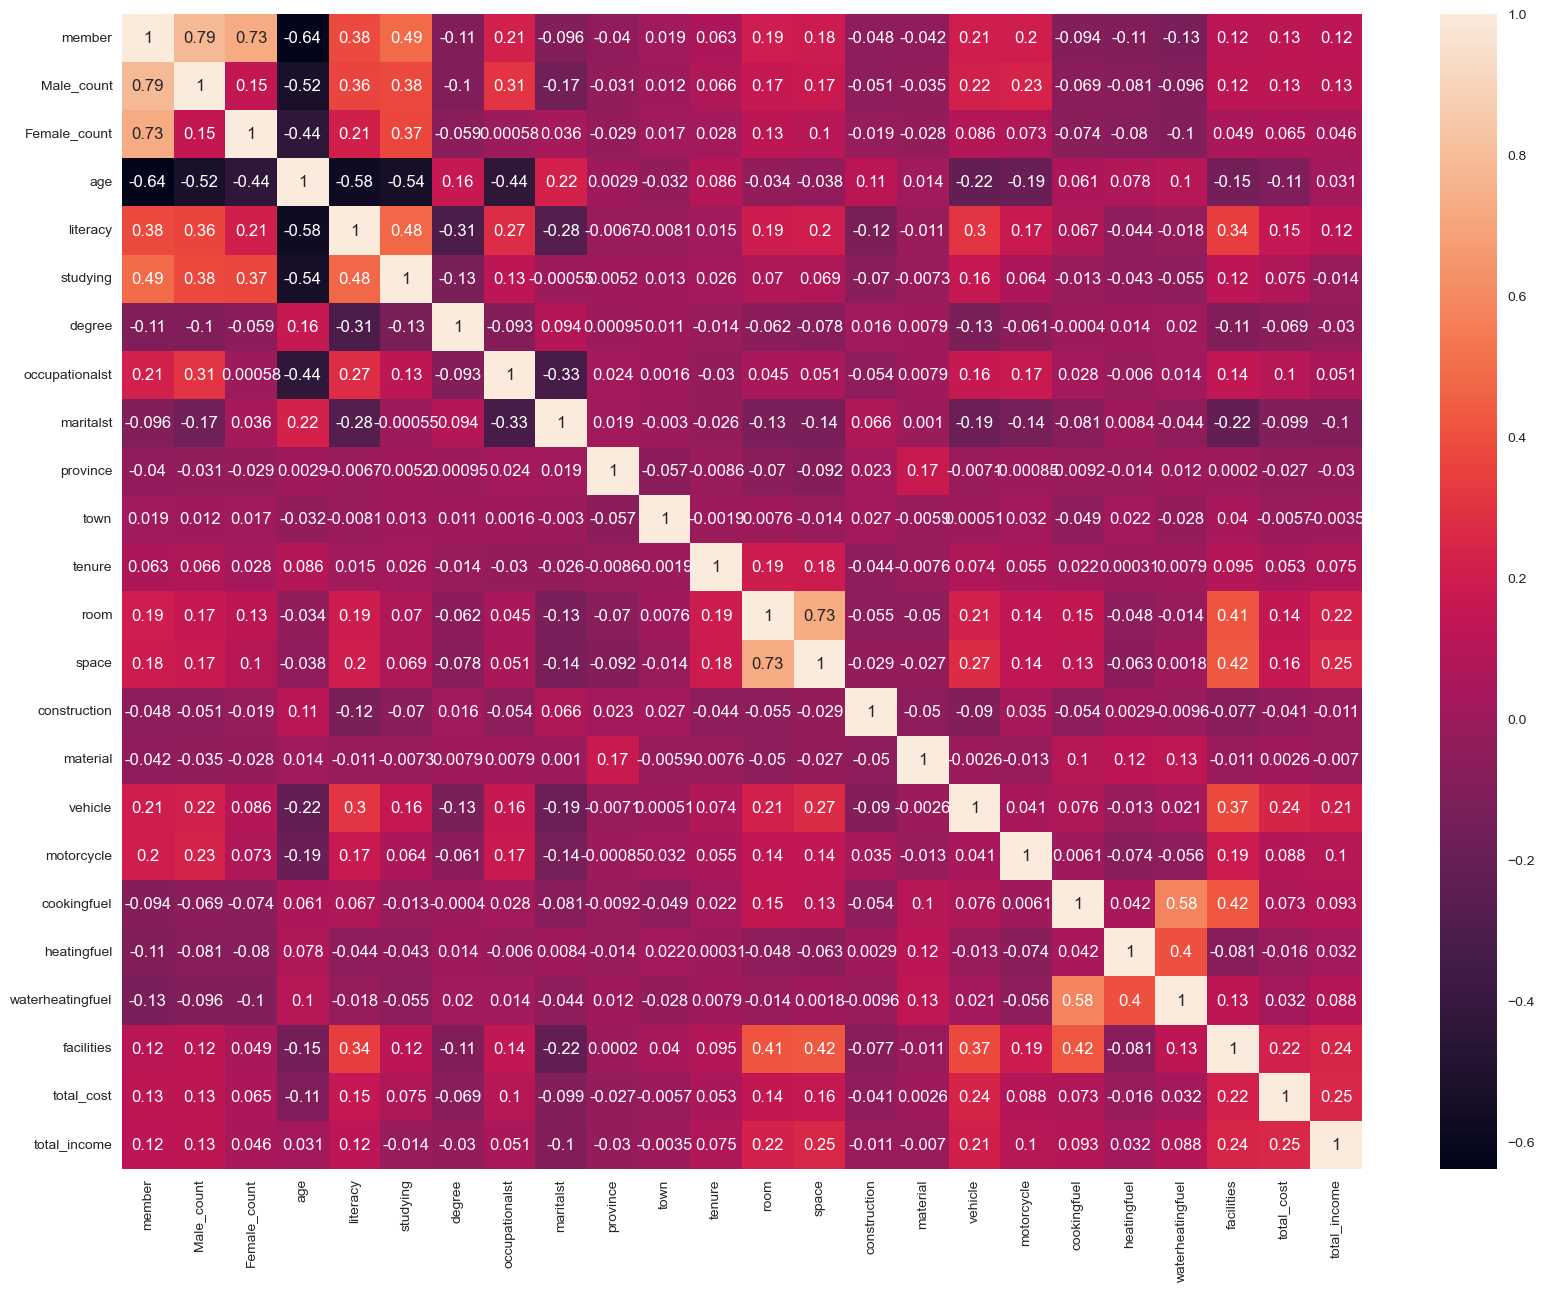

In [138]:
corr = pd.DataFrame(total_df_corr).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
سواد داشتن با میزان ازدواج رابطه عکس داره 0.28 منفی یعنی هر چقدر سواد بره بالا میزان ازدواج تو خانواده کمتر میشه
</p>



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر female_count  یک خانواده بیشتر باشه تعداد اتاق های منزل هم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر وسیله نقلیه یه خونواده بیشتر باشه هزینه هاشم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر دانش آموز بیشتری داشته باشه یه خانواده امکانات منزلش هم باید بیشتر باشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر سن بالاتر بره تو خانواده تعداد اعضای اون خانواده کمتر میشه
</p>

**Clustering after PCA**

In [139]:

# pca = PCA(2)


# df = pca.fit_transform(data_scaled)


# from sklearn.cluster import KMeans

# gmm = GaussianMixture(n_components=5)
# gmm.fit(df)
# # kmeans = KMeans(n_clusters= 6,init="k-means++")

# # label = kmeans.fit_predict(df)
# label = gmm.predict(df)

# u_labels = np.unique(label)

# # closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

# plt.subplots(figsize=(10,10))
# for i in u_labels:
#     sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
# # sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
# # sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

# plt.xlabel('x0')
# plt.ylabel('x1')
# plt.legend()
# plt.show()

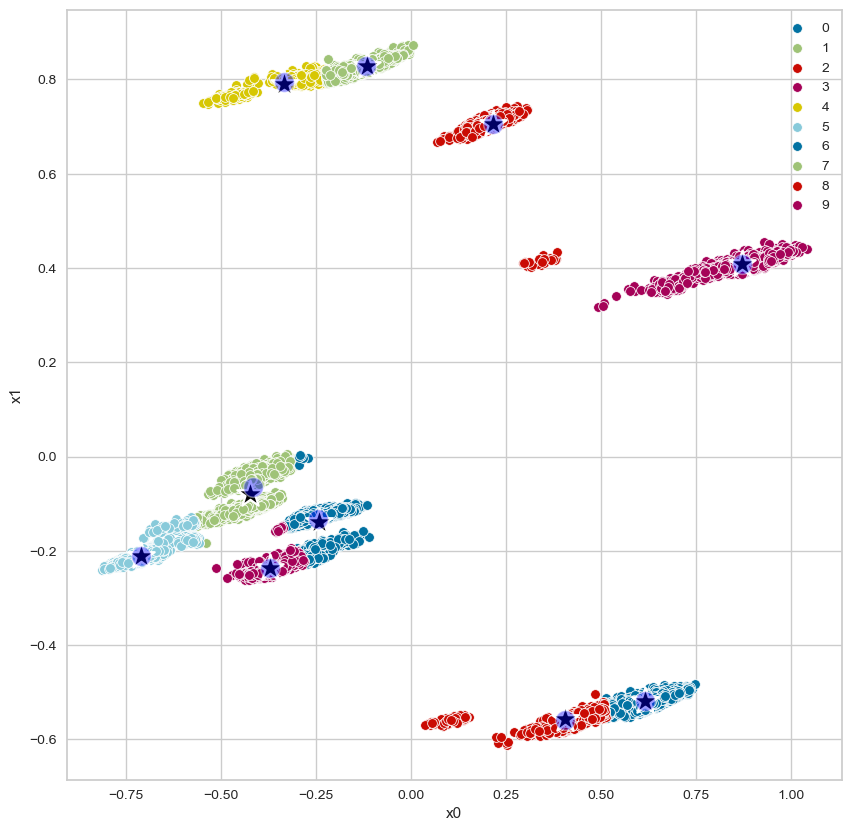

In [166]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**decision boundary visualization**

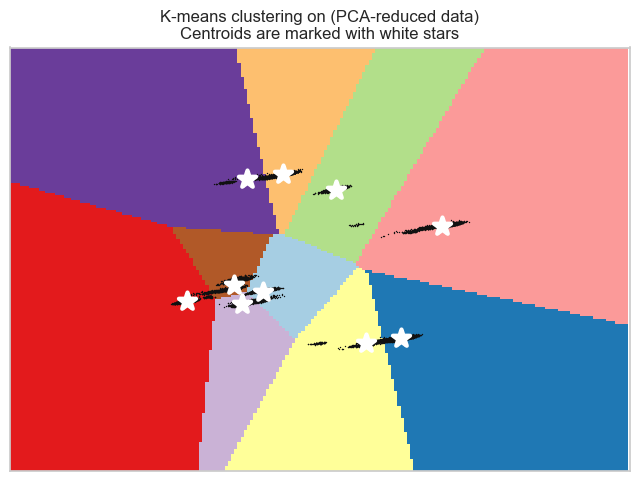

In [167]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on (PCA-reduced data)\n'
          'Centroids are marked with white stars')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
 

In [168]:
# total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

In [169]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_7580\3833494303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 3468, 15166,  9221, 13188,  6052,  2089,  9776,  8549, 11807,
        6987], dtype=int64)

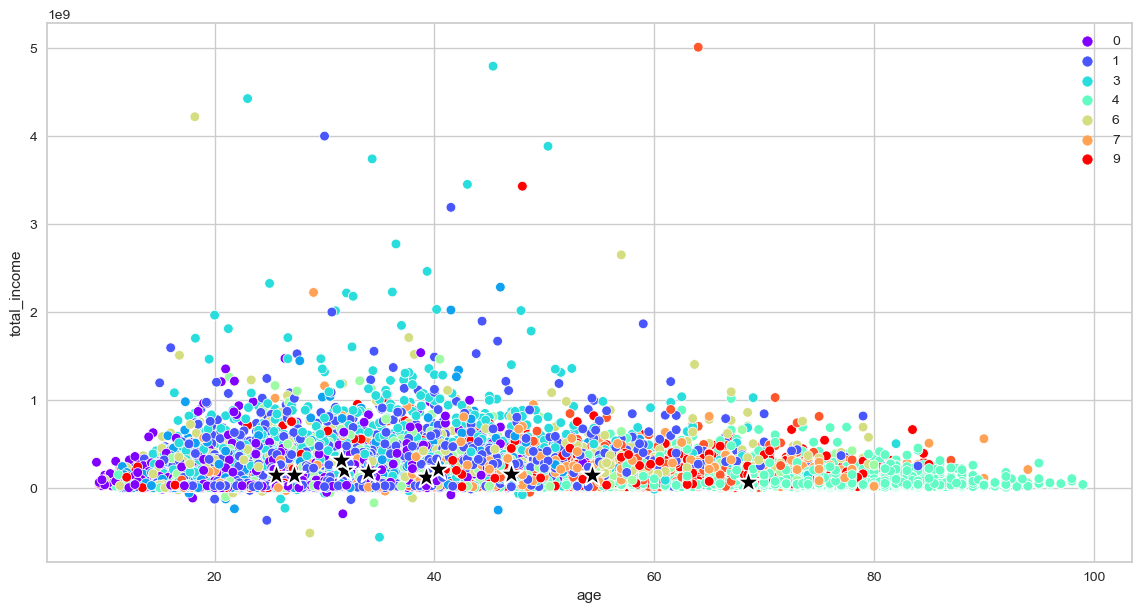

In [170]:

col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**noghate namayesh dahande marakez har cluster**

In [171]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
13188,4,2,2,31.500000,0.750000,1,1,7,185101000.0,314340000.0,3
8549,3,1,2,40.333333,1.000000,0,0,5,32236264.0,214210000.0,7
15166,4,2,2,31.750000,1.000000,1,0,7,159077000.0,198840000.0,1
2089,4,2,2,34.000000,1.000000,0,1,6,59813000.0,177900000.0,5
6987,2,1,1,47.000000,0.500000,0,0,5,72453000.0,155920000.0,9
9221,5,2,3,25.600000,0.600000,0,1,5,276263180.0,146845000.0,2
3468,4,2,2,27.250000,0.750000,0,0,5,114542140.0,146760000.0,0
11807,3,1,2,54.333333,0.333333,0,1,5,51939328.0,144560000.0,8
9776,4,2,2,39.250000,0.500000,1,0,6,60207552.0,118840000.0,6
6052,2,1,1,68.500000,0.000000,0,0,4,10761276.0,68220000.0,4


**be khanevar haye 1 nafari tavajoh konid ke aghlab hodode 70 sal sen darand**

**WCSS: It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.**

within cluster sum of squared distance for k=2:  10550.490951927262
within cluster sum of squared distance for k=3:  6763.933276182062
within cluster sum of squared distance for k=4:  4268.249366743392
within cluster sum of squared distance for k=5:  2915.301598454416
within cluster sum of squared distance for k=6:  2560.9324142546848
within cluster sum of squared distance for k=7:  2457.662994748522
within cluster sum of squared distance for k=8:  2314.9648140620066
within cluster sum of squared distance for k=9:  2151.1437271053114
within cluster sum of squared distance for k=10:  2065.9307545115253
within cluster sum of squared distance for k=11:  1971.9934649688532
within cluster sum of squared distance for k=12:  1802.7004657448897
within cluster sum of squared distance for k=13:  1693.954180515846
within cluster sum of squared distance for k=14:  1657.8576160061818
within cluster sum of squared distance for k=15:  1554.6235472715316
within cluster sum of squared distance for k=16

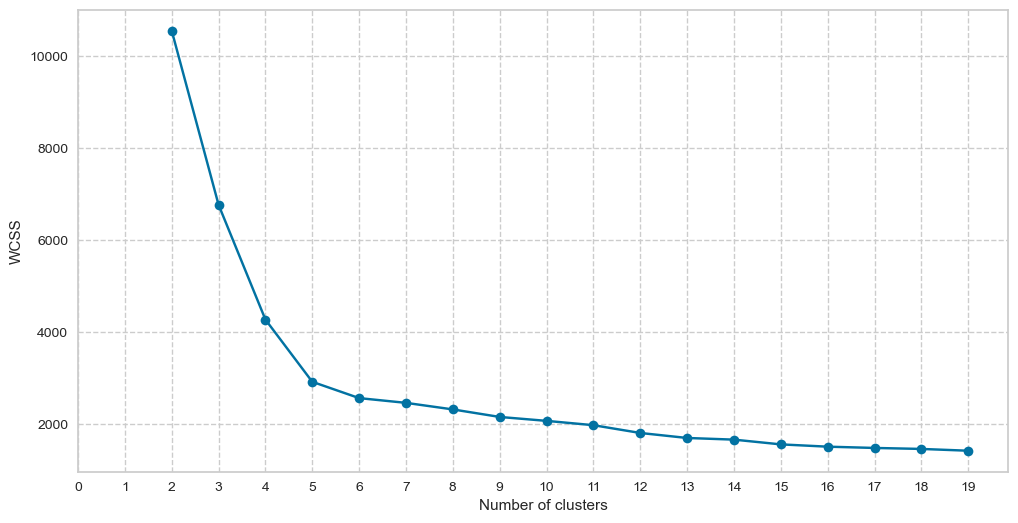

In [154]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette: The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


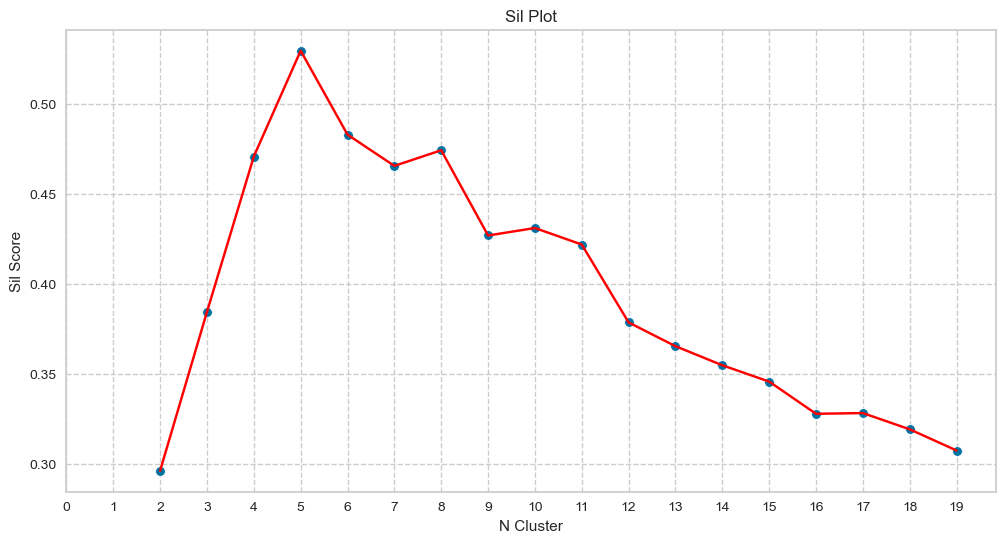

In [155]:

from sklearn.metrics import silhouette_score
df =data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Silhouette Visualizer**

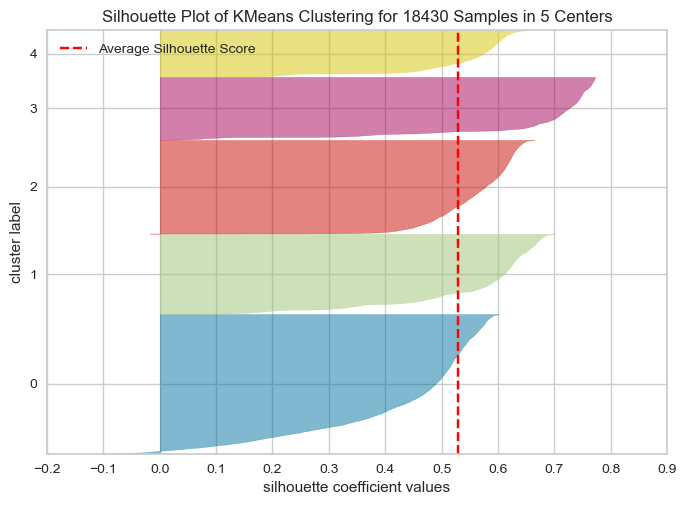

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18430 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [156]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()    

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
در این نمایش از Sil درواقع خط چین قرمز میانگین Sil میباشد که اولا هر چه این مقدار به 1 نزدیک تر باشد خوشه های بهتری داریم ثانیا سایزخوشه ها هم باید تقریبا یکسان باشد مثلا در مثال بالا اگر k=6 میشد مقدار sil  به کمتر از 0.5 کاهش میافت و سایز خوشه ها کوچک و بزرگ میشد بنابراین بهترین مقدار برای k همین 5 است.
</p>

**Decision Boundary**

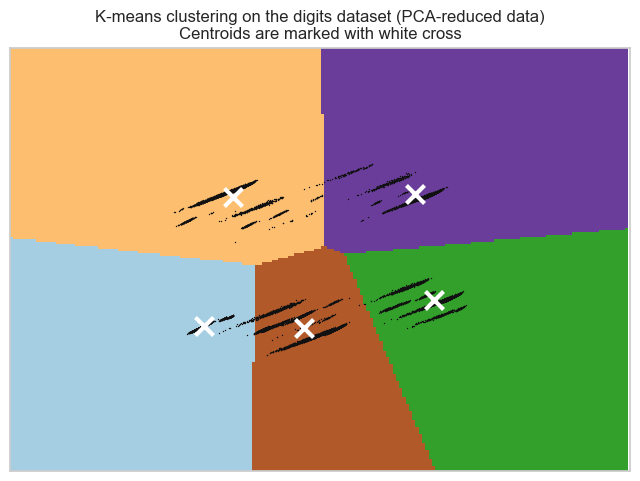

In [157]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [77]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=5,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

array([13858, 10705,  8315, 13188,  4822], dtype=int64)

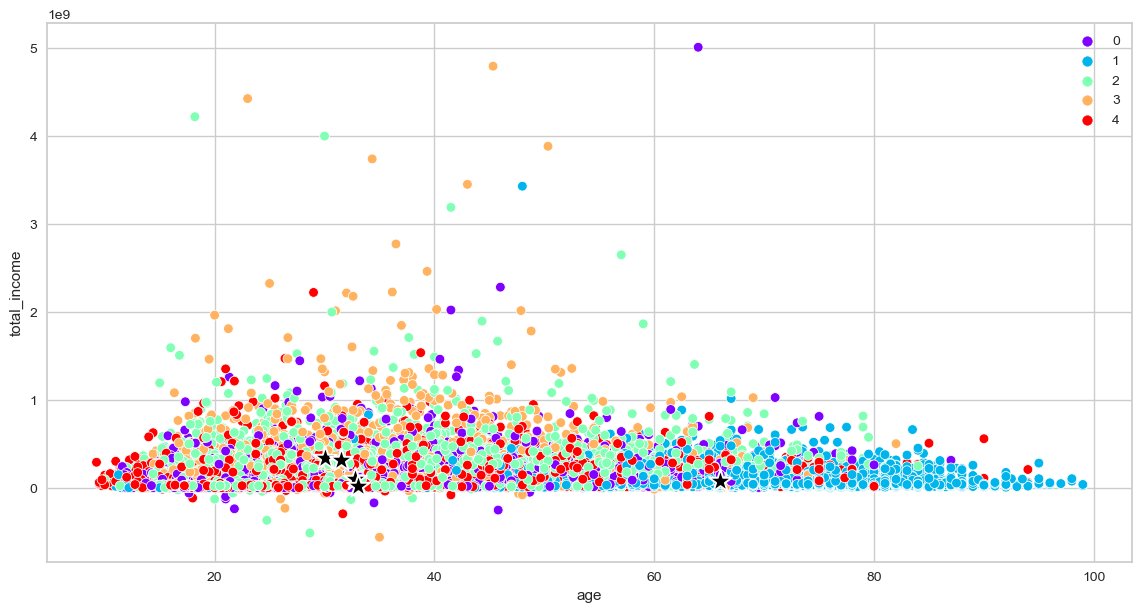

In [78]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

In [79]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
8315,4,2,2,30.00,0.75,1,0,6,72743552.0,334810000.0,2
13188,4,2,2,31.50,0.75,1,1,7,185101000.0,314340000.0,3
13858,4,2,2,32.75,0.75,0,1,5,107191052.0,95840000.0,0
10705,2,1,1,66.00,0.00,0,0,4,38508776.0,79820000.0,1
4822,4,2,2,33.00,0.75,0,0,5,58385552.0,23040000.0,4


<b><p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
تلاش هایی برای نمایش بهتر شکست در دونمودار Sil و elbow  برای یافتن بهترین مقدار k
</p></b>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
pca اگر اسکیل داده ها نامناسب باشد کمک خاصی به بهتر شدن نمودار elbow ,Silhouette نمی کند
</p>

**pca for finding k**

In [ ]:
pca = PCA(5)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

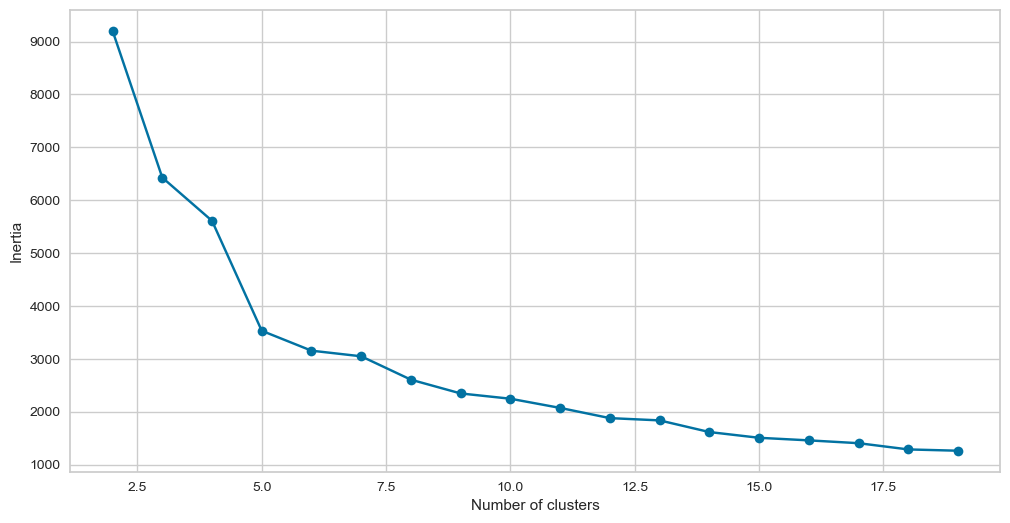

In [ ]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


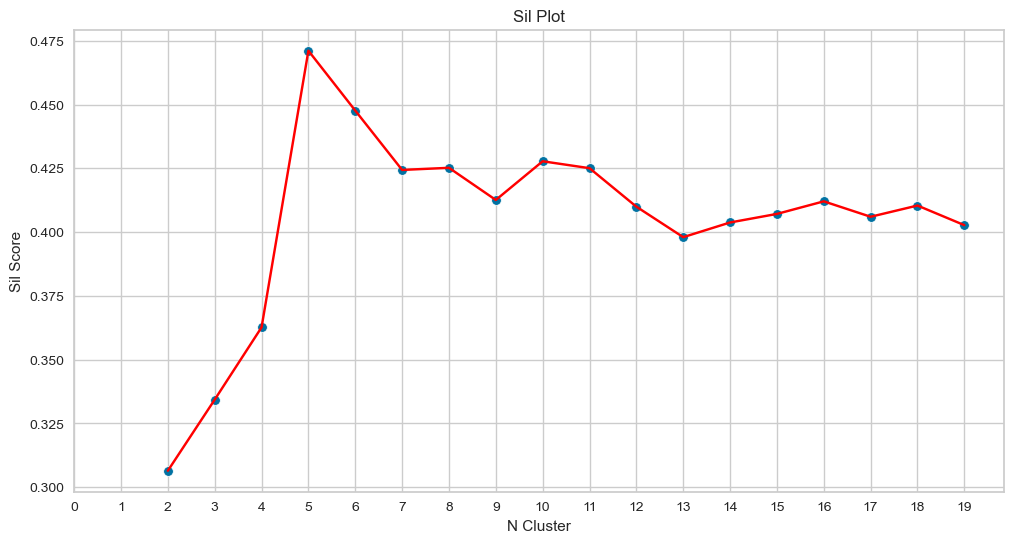

In [ ]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

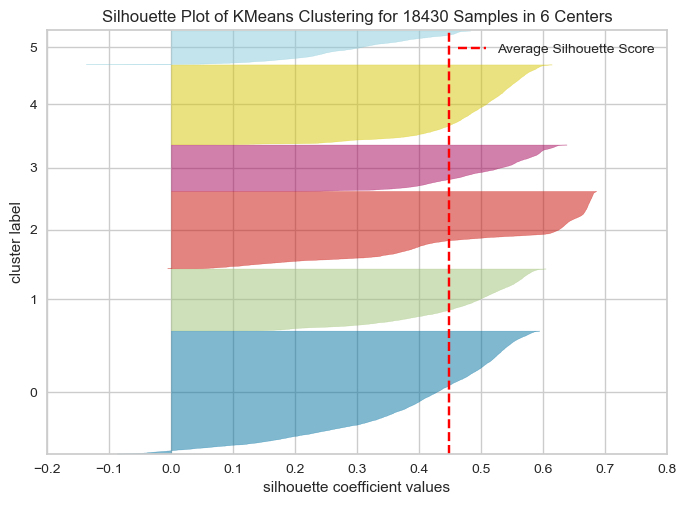

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18430 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()    

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++",random_state=42).fit(df)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df)
closest

array([14140, 12273, 10676, 13487,  5594,  5606], dtype=int64)

In [ ]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,studying,degree,occupationalst,maritalst,town,...,material,vehicle,motorcycle,cookingfuel,heatingfuel,waterheatingfuel,facilities,total_cost,total_income,Clusters
12273,5,3,2,24.600000,0.800000,0.200000,2,4,2,3,...,4,1,0,3,3,4,6,107379996.0,268700000.0,1
5606,6,3,3,21.333333,0.500000,0.166667,6,5,2,9,...,4,1,0,2,0,4,2,38278328.0,83760000.0,5
10676,3,1,2,42.000000,0.000000,0.000000,6,0,1,1,...,2,0,0,3,3,4,3,45974998.0,72090000.0,2
13487,5,3,2,19.000000,0.600000,0.200000,3,5,2,4,...,2,1,1,2,0,1,6,68731000.0,27300000.0,3
5594,4,3,1,37.000000,0.750000,0.000000,4,4,2,9,...,2,0,1,3,3,1,3,10642552.0,21840000.0,4
14140,7,4,3,19.714286,0.571429,0.285714,3,4,2,9,...,4,0,0,3,3,4,4,39010000.0,0.0,0


In [ ]:
total_df.loc[total_df.Clusters == 5, ].age.mean()

34.64923703990868

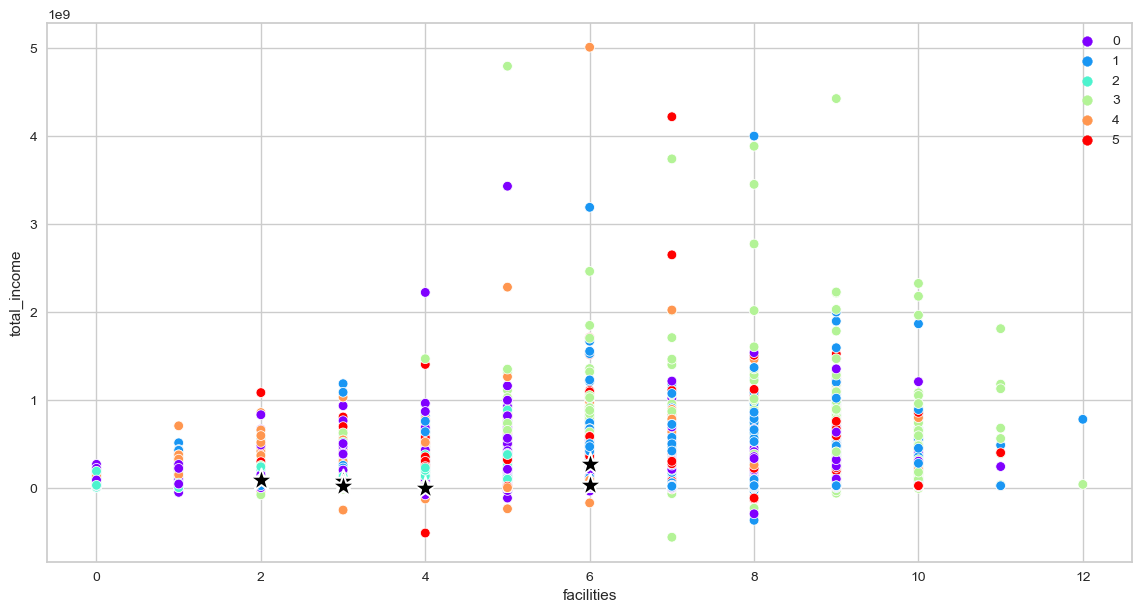

In [ ]:
col0='facilities'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()